In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [17]:
matches = pd.read_csv('ContinousDataset.csv', index_col=0)
original = pd.read_csv('originalDataset.csv', index_col=0)

In [18]:
matches.head(2)

,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
Unnamed: 0,,,,,,,,,,,,
0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First


In [19]:
original.head(2)

,Team 1,Team 2,Winner,Margin,Ground,Match Date
Scorecard,,,,,,
ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"


In [6]:
odi_matches_df.shape

(7494, 240)

In [20]:
#Total Number of ODI Matches Played:
print(" Number of ODI Matches Played:" ,matches.shape[0])
#Teams Played:
print("\nTeams:\n", matches['Team 1'].unique())
#Number of Grounds for Matches:
print("\nNumber of Grounds Used:", matches['Ground'].nunique())
#Matches Played at Neutral Venue:
print("Number of Neutral Ground Matches:",
     matches.loc[matches.Venue_Team1 == 'Neutral'].shape[0])

 Number of ODI Matches Played: 7494

Teams:
 ['Australia' 'England' 'New Zealand' 'East Africa' 'Sri Lanka' 'Pakistan'
 'India' 'West Indies' 'Canada' 'Bangladesh' 'South Africa' 'Zimbabwe'
 'U.A.E.' 'Netherlands' 'Kenya' 'Scotland' 'Namibia' 'Hong Kong' 'Bermuda'
 'Ireland' 'Afghanistan' 'P.N.G.' 'U.S.A.']

Number of Grounds Used: 161
Number of Neutral Ground Matches: 2276


In [21]:
print('Matches Won By Home Country:\n',
     round(matches.loc[matches.Winner == matches.Host_Country].shape[0]/7494*100,2), '%')
print('\nNumber of times Home Team Batted First:\n',
     round(matches.loc[((matches['Venue_Team1'] == 'Home') & (matches['Innings_Team1'] == 'First')) |
                       ((matches['Venue_Team2'] == 'Home') & (matches['Innings_Team2'] == 'First'))].shape[0]/7494*100,2), 
      '%')

Matches Won By Home Country:
 40.41 %

Number of times Home Team Batted First:
 33.47 %


In [22]:
print('Winning Team Based on Innings in %:\n',
     matches.Margin.value_counts()/7494*100)

Winning Team Based on Innings in %:
 Winner2ndInning    50.894049
Winner1stInning    49.105951
Name: Margin, dtype: float64


In [23]:
print('Most Matches won at Neutral Venues:'
,matches.loc[matches.Venue_Team1 == 'Neutral'].Winner.value_counts().idxmax())

Most Matches won at Neutral Venues: Pakistan


<function matplotlib.pyplot.show(close=None, block=None)>

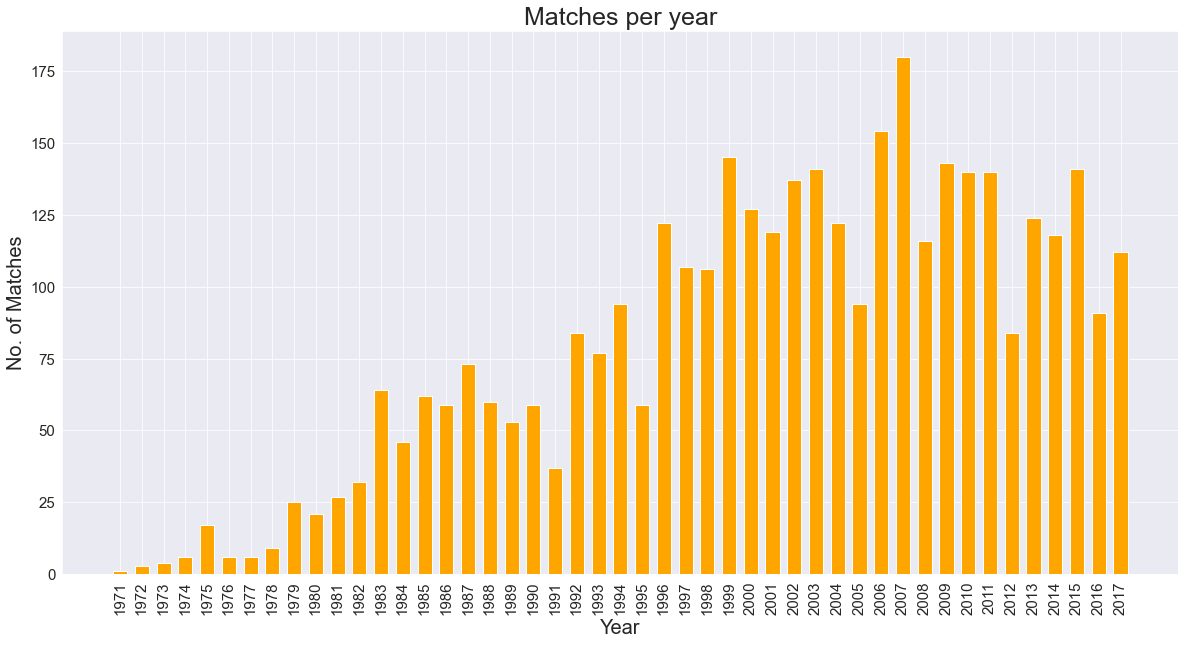

In [24]:
matches['Year'] = matches['Match Date'].str[-4:]
yearwise = matches[['Year']].value_counts()/2
yearwise = yearwise.reset_index()
yearwise.columns =['Year', 'Matches']
yearwise =yearwise.sort_values(by='Year', ascending=True)
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
plt.bar(yearwise['Year'], yearwise['Matches'], width=0.65, color='orange')
plt.xticks(rotation='vertical', size=15)
plt.yticks(size=15)
plt.xlabel('Year', size=20)
plt.ylabel('No. of Matches', size=20)
plt.title('Matches per year', size=25)
plt.show

In [26]:
def homewin(row):
    if row['Winner'] == row['Host_Country']:
        return row['Winner']
def awaywin(row):
    if ((row['Winner'] == row['Team 1']) and (row['Venue_Team1'] != 'Home')) or ((row['Winner'] == row['Team 2']) 
                                                                                 and (row['Venue_Team2'] != 'Home')):
        return row['Winner']
def homematches(row):
    if (row['Host_Country'] == row['Team 1']):
        return row['Team 1']
    elif (row['Host_Country'] == row['Team 2']):
        return row['Team 2']
def wins(row):
    if (row['Team 1'] == row['Winner']):
        return row['Team 1']
    elif (row['Team 2'] == row['Winner']):
        return row['Team 2']
def dwin(row):
    if (row['Team 1'] == row['Winner']) and (row['Innings_Team1'] == 'First'):
        return row['Team 1']
    elif (row['Team 2'] == row['Winner']) and (row['Innings_Team2'] == 'First'):
        return row['Team 2']
def cwin(row):
    if (row['Team 1'] == row['Winner']) and (row['Innings_Team1'] == 'Second'):
        return row['Team 1']
    elif (row['Team 2'] == row['Winner']) and (row['Innings_Team2'] == 'Second'):
        return row['Team 2']

In [27]:
matches['Home Win'] = matches.apply(homewin, axis='columns')
matches['Away Win'] = matches.apply(awaywin, axis='columns')
matches['Home Matches'] = matches.apply(homematches, axis = 'columns')
matches['Wins'] = matches.apply(wins, axis ='columns')
matches['Defend'] = matches.apply(dwin, axis ='columns')
matches['Chase'] = matches.apply(cwin, axis ='columns')

In [28]:
Review = pd.concat([matches['Team 1'], matches["Team 2"]])
Review = Review.value_counts()/2
Review = Review.reset_index()
Review.columns=['Teams', 'Total Matches']
Review.set_index('Teams', inplace=True)

In [29]:
hmatches = matches['Home Matches'].value_counts().reset_index().set_index('index')
awin = matches['Away Win'].value_counts().reset_index().set_index('index')
hwin = matches['Home Win'].value_counts().reset_index().set_index('index')
wins = matches['Wins'].value_counts().reset_index().set_index('index')
defended = matches['Defend'].value_counts().reset_index().set_index('index')
chased = matches['Chase'].value_counts().reset_index().set_index('index')

In [30]:
Review['Home Matches'] = hmatches['Home Matches']/2
Review['Away Matches'] = Review['Total Matches'] - Review['Home Matches']
Review['Total Wins'] = wins['Wins']/2
Review['Home Win'] = hwin['Home Win']/2
Review['Away Win'] = awin['Away Win']/2
Review['Successful Defences'] = defended['Defend']/2
Review['Successful Chases'] = chased['Chase']/2

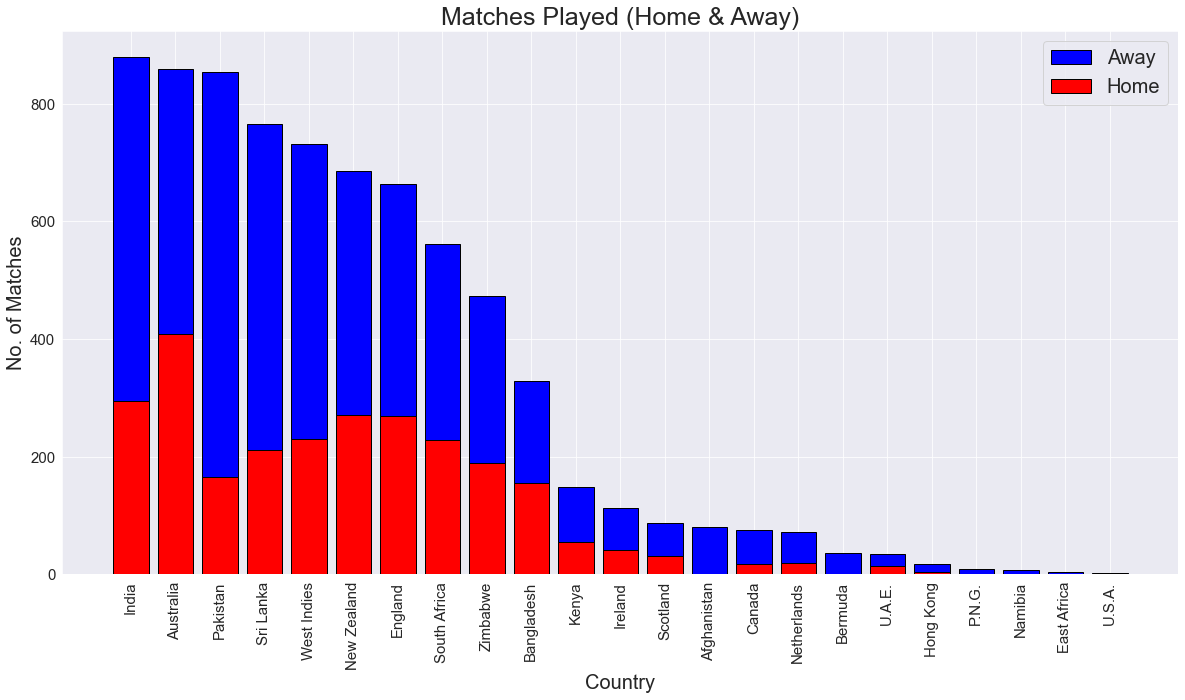

In [31]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20,10))
m1 = plt.bar( Review.index , Review['Total Matches'], width=0.8, color='blue', edgecolor='black')
m2 = plt.bar( Review.index , Review['Home Matches'], width=0.8, color='red', edgecolor='black')
plt.xticks(Review.index,Review.index, rotation='vertical', size=15)
plt.yticks(size=15)
plt.show
plt.title('Matches Played (Home & Away)', size=25)
plt.xlabel('Country', size=20)
plt.ylabel('No. of Matches', size=20)
plt.legend((m1[0], m2[0]) ,('Away', 'Home'), prop={"size" :20}, loc=1)

<function matplotlib.pyplot.show(close=None, block=None)>

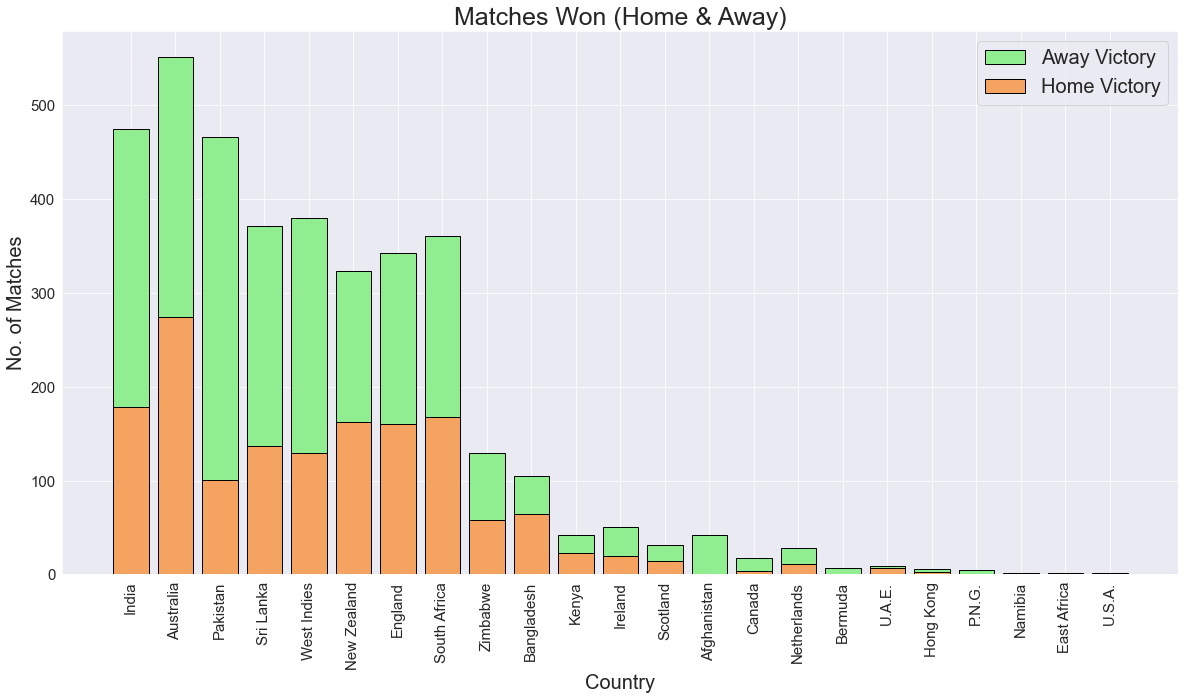

In [32]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20,10))
a1 = plt.bar( Review.index , Review['Total Wins'], width=0.8, color='lightgreen', edgecolor='black')
h1 = plt.bar( Review.index , Review['Home Win'], width=0.8, color='sandybrown', edgecolor='black')
plt.xticks(Review.index,Review.index, rotation='vertical', size=15)
plt.yticks(size=15)
plt.show
plt.title('Matches Won (Home & Away)', size=25)
plt.xlabel('Country', size=20)
plt.ylabel('No. of Matches', size=20)
plt.legend((a1[0], h1[0]) ,('Away Victory', 'Home Victory'), prop={"size" :20}, loc=1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

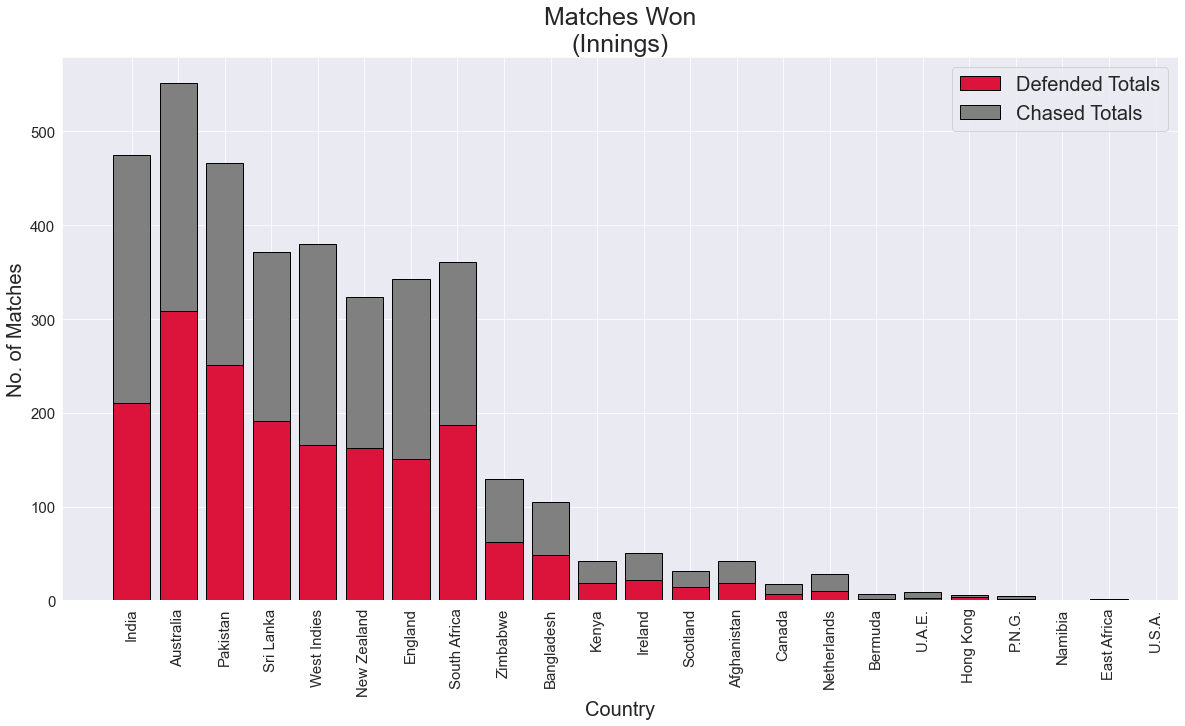

In [33]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
w1 = plt.bar( Review.index , Review['Successful Defences'], width=0.8, color='crimson', edgecolor='black')
w2 = plt.bar( Review.index , Review['Successful Chases'], width=0.8, bottom=Review['Successful Defences'], color='grey'
            ,edgecolor='black')
plt.xticks(Review.index,Review.index, rotation='vertical', size=15)
plt.yticks(size=15)
plt.show
plt.title('Matches Won\n(Innings)', size=25)
plt.xlabel('Country', size=20)
plt.ylabel('No. of Matches', size=20)
plt.legend((w1[0], w2[0]) ,('Defended Totals', 'Chased Totals'), prop={"size" :20}, loc=1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

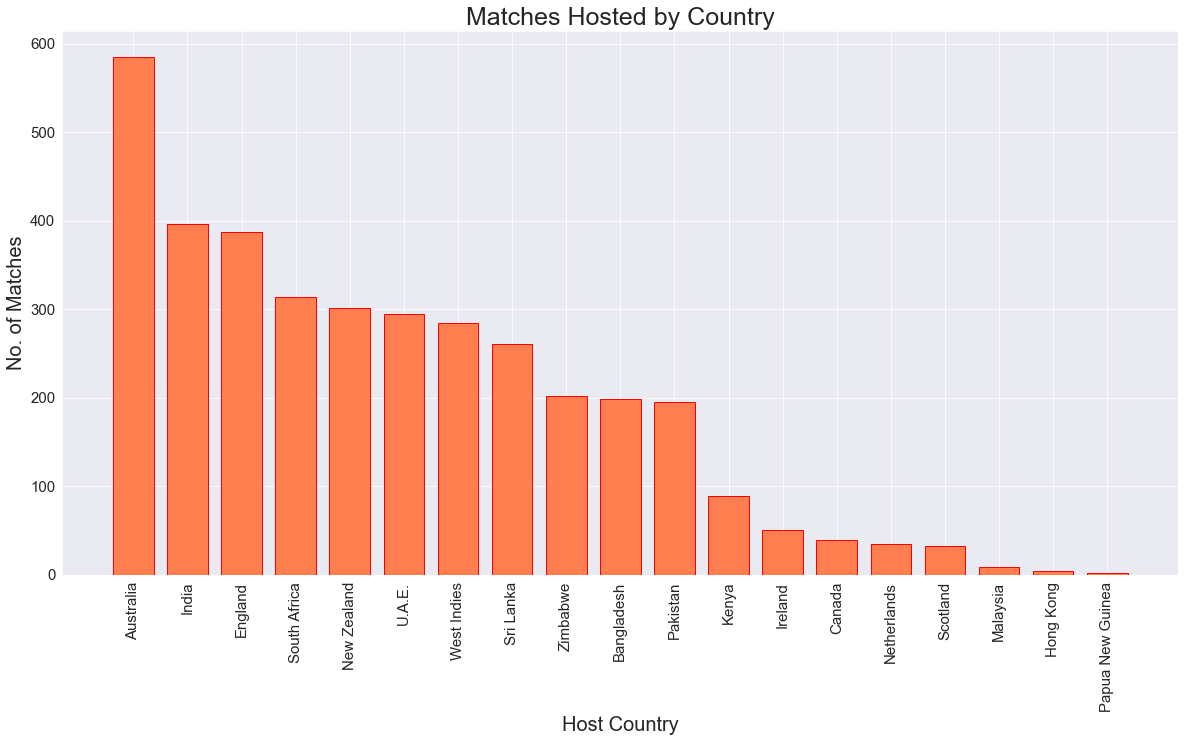

In [34]:
host = matches['Host_Country'].value_counts()/2
host = host.reset_index()
host.columns =['Country', 'Matches Hosted']
plt.figure(figsize=(20,10))
plt.bar(host['Country'], host['Matches Hosted'], width=.75, color='coral', edgecolor='red')
plt.xticks(rotation='vertical', size=15)
plt.yticks(size=15)
plt.xlabel('Host Country', size=20)
plt.ylabel('No. of Matches', size=20)
plt.title('Matches Hosted by Country', size=25)
plt.show

In [35]:
def ywin(country):
    data = matches.loc[matches.Winner == country].groupby('Year').apply(lambda p : p.Winner.value_counts()/2)
    return data
for team in matches['Winner'].unique():
    ydata = ywin(team)
    if team == 'Australia':
        yearwisewin = ydata
        yearwisewin
    elif team != 'Australia':
        yearwisewin = yearwisewin.join(ydata)
        yearwisewin

<function matplotlib.pyplot.show(close=None, block=None)>

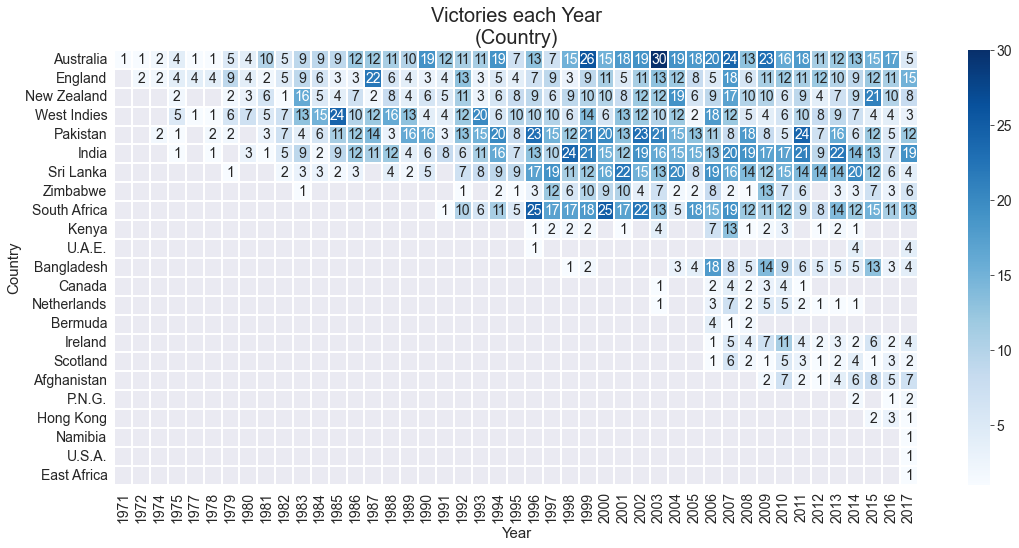

In [36]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,8))
sns.heatmap(data=yearwisewin.transpose(), annot=True, cmap='Blues', linewidth=.05)
plt.xlabel('Year', size=15)
plt.ylabel('Country', size=15)
plt.title('Victories each Year\n(Country)', size=20)
plt.show

In [37]:
def cwin(country):
    played = original.loc[((original['Team 1'] == country) | (original['Team 2'] == country)) & 
                          (original['Winner'] == country)]
    wplayed = played.groupby(['Team 1', 'Team 2']).apply(lambda p : p.Winner.value_counts()).reset_index()
    w1played = wplayed.loc[wplayed['Team 1'] == country]
    w1played = w1played.rename(columns={'Team 2': 'Against','Team 1': 'Country' })
    w2played = wplayed.loc[wplayed['Team 2'] == country]
    w2played = w2played.rename(columns={'Team 1': 'Against','Team 2': 'Country' })
    finalwon = pd.concat([w1played, w2played]).groupby('Against').apply(lambda p : p[country].sum()).reset_index()
    finalwon = finalwon.set_index('Against')
    finalwon.columns = [country]
    
    nmatches = original.loc[(original['Team 1'] == country) | (original['Team 2'] == country)]
    mplayed = nmatches.groupby(['Team 1']).apply(lambda p : p['Team 2'].value_counts()).reset_index()
    m1played = mplayed.loc[mplayed['Team 1'] == country]
    m1played = m1played.rename(columns={'level_1': 'Against','Team 1': 'Country' })
    m2played = mplayed.loc[mplayed['level_1'] == country]
    m2played = m2played.rename(columns={'Team 1': 'Against','level_1': 'Country' })
    finalplayed = pd.concat([m1played, m2played]).groupby('Against').apply(lambda p : p['Team 2'].sum()).reset_index()
    finalplayed = finalplayed.set_index('Against')
    finalplayed.columns = [country]
    
    winpercent = finalwon/finalplayed
    return winpercent

teamnames = original['Winner'].unique()
teamnames = teamnames[(teamnames != 'tied') & (teamnames != 'no result') & (teamnames != 'ICC World XI')
                     & (teamnames != 'Asia XI') & (teamnames != 'Africa XI')]

for team in teamnames:
    cdata = cwin(team)
    if team == 'Australia':
        oppwisewin = cdata
        oppwisewin
    elif team != 'Australia':
        oppwisewin = oppwisewin.join(cdata)
        oppwisewin = oppwisewin.transpose()
        oppwisewin['Australia'] = 1 - oppwisewin.transpose().Australia
        oppwisewin = oppwisewin.transpose()
        oppwisewin

<function matplotlib.pyplot.show(close=None, block=None)>

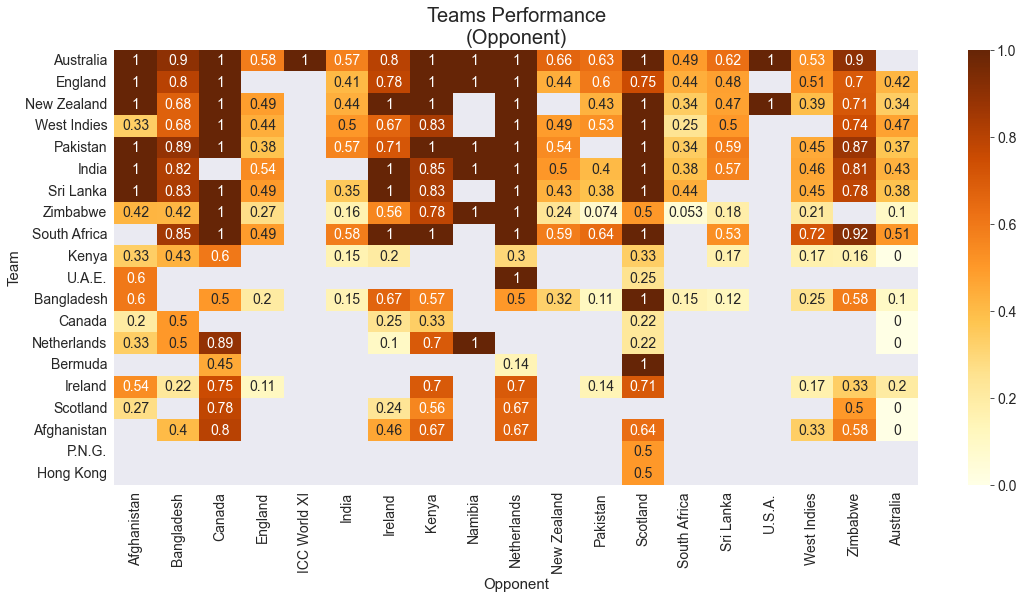

In [38]:
sns.set_style('dark')
plt.figure(figsize=(18,8))
sns.heatmap(data=oppwisewin.transpose(), annot=True, cmap='YlOrBr')
plt.xlabel('Opponent', size=15)
plt.ylabel('Team', size=15)
plt.title('Teams Performance\n(Opponent)', size=20)
plt.show